### ***Importación de librerias***

In [57]:
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 
import seaborn as sn
import matplotlib.pyplot as plt

### ***Importación de datos de entrenamiento a procesar***

In [58]:
train = pd.read_csv('dataset2/CSV_V2/clothes_V2.csv')
y_train = train['label'][0:800].values

HARALICK_Train = pd.read_csv('dataset2/CSV_V2/Haralick_Descriptor_clothes_Train.csv')
HOG_Train = pd.read_csv('dataset2/CSV_V2/HOG_Descriptor_clothes_Train.csv')
LBP_Train = pd.read_csv('dataset2/CSV_V2/LBP_Descriptor_clothes_Train.csv')
SIFT_Train = pd.read_csv('dataset2/CSV_V2/SIFT_Descriptor_clothes_Train.csv')
WAVELET_Train = pd.read_csv('dataset2/CSV_V2/WAVELET_Descriptor_clothes_Train.csv')

HARALICK_Train = HARALICK_Train.to_numpy()
HOG_Train = HOG_Train.to_numpy()
LBP_Train = LBP_Train.to_numpy()
SIFT_Train = SIFT_Train.to_numpy()
WAVELET_Train = WAVELET_Train.to_numpy()

print(HARALICK_Train.shape)
print(HOG_Train.shape)
print(LBP_Train.shape)
print(SIFT_Train.shape)
print(WAVELET_Train.shape)
print(y_train.shape)

(800, 18)
(800, 1568)
(800, 17)
(800, 20)
(800, 30)
(800,)


### ***Importación de datos de prueba a procesar***

In [59]:
y_test = train['label'][801:1000].values

HARALICK_Test = pd.read_csv('dataset2/CSV_V2/Haralick_Descriptor_clothes_Test.csv')
HOG_Test = pd.read_csv('dataset2/CSV_V2/HOG_Descriptor_clothes_Test.csv')
LBP_Test = pd.read_csv('dataset2/CSV_V2/LBP_Descriptor_clothes_Test.csv')
SIFT_Test = pd.read_csv('dataset2/CSV_V2/SIFT_Descriptor_clothes_Test.csv')
WAVELET_Test = pd.read_csv('dataset2/CSV_V2/WAVELET_Descriptor_clothes_Test.csv')


HARALICK_Test = HARALICK_Test.to_numpy()
HOG_Test = HOG_Test.to_numpy()
LBP_Test = LBP_Test.to_numpy()
SIFT_Test = SIFT_Test.to_numpy()
WAVELET_Test = WAVELET_Test.to_numpy()

print(HARALICK_Test.shape)
print(HOG_Test.shape)
print(LBP_Test.shape)
print(SIFT_Test.shape)
print(WAVELET_Test.shape)
print(y_test.shape)

(199, 18)
(199, 1568)
(199, 17)
(199, 20)
(199, 30)
(199,)


### ***Balanceo de clases***

In [60]:
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 1.3289036544850499, 1: 0.8016032064128257}

### ***Optimización de parámetros***

In [61]:
# model = svm.SVC() 
# model.fit(HARALICK_Train, y_train) 
   
# # print prediction results 
# predictions = model.predict(HARALICK_Test) 
# print(classification_report(y_test, predictions)) 

In [62]:
# # defining parameter range 
# param_grid = {'C': [0.1, 10],  
#               'gamma': [1, 0.01, 0.0001], 
#               'gamma':['scale', 'auto'],
#               'kernel': ['linear', 'rbf']}  
   
# grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# # fitting the model for grid search 
# grid.fit(HARALICK_Train, y_train) 
 
# # print best parameter after tuning 
# print(grid.best_params_) 
# grid_predictions = grid.predict(HARALICK_Test) 
   
# # print classification report 
# print(classification_report(y_test, grid_predictions)) 

In [63]:
# grid2 = RandomizedSearchCV(svm.SVC(), param_grid, n_iter=10) 


   
# # fitting the model for grid search 
# grid2.fit(HARALICK_Train, y_train) 
 
# # print best parameter after tuning 
# print(grid2.best_params_) 
# grid_predictions2 = grid2.predict(HARALICK_Test) 
   
# # print classification report 
# print(classification_report(y_test, grid_predictions2)) 

### ***Modelo logístico de regresión***

In [64]:
def logistic_model(x_train, y_train, x_test, y_test, class_weights, colorGraphic):
    model_log = linear_model.LogisticRegression(class_weight = class_weights)  
    model_log.fit(x_train, y_train)
    y_pred = model_log.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    VP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    VN = cm[1][1]
    precision = VP/(VP+FP)
    sensibilidad = VP/(VP+FN)
    especificidad  = VN/(VN+FP)
    accuracy = (VP+VN)/(VP+VN+FN+FP)
    F1_score = (2*precision*sensibilidad)/(precision+sensibilidad)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, model_log.decision_function(x_test))
    
    # AUC
    area = roc_auc_score(y_test, model_log.predict_proba(x_test)[:, 1])

    df = pd.DataFrame([precision, sensibilidad, especificidad , accuracy, F1_score, area, VP, VN, FP, FN], columns = ['Value'], 
                      index=['Precision', 'Sensibilidad', 'Especificidad ','Accuracy', 'F1_score', 'Area', 'VP', 'VN', 'FP', 'FN'])

    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    fig.suptitle("Resumen del modelo de regresión logística", fontsize=18, fontweight = 'bold', color='#1C77C3')
    fig.tight_layout()
    sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt=".0f", cbar=False, cmap='RdYlGn', ax=axs[0])
    axs[0].set_title('Matriz de confusión', fontweight = 'bold')    
    axs[0].tick_params(labelsize=12)
    axs[1].stackplot(fpr, tpr, labels = ['Area: '+ str(round(area,3))], colors = colorGraphic)
    axs[1].legend(loc = 'upper left')
    axs[1].set_xlabel('1 - Especificidad', fontsize=12)
    axs[1].set_ylabel('Sensibilidad', fontsize=12)
    axs[1].set_title('Curva ROC', fontweight = 'bold')
    axs[1].tick_params(labelsize=8)
    plt.show()

    return df 
    

#### ***Haralick***

c:\Users\matea\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


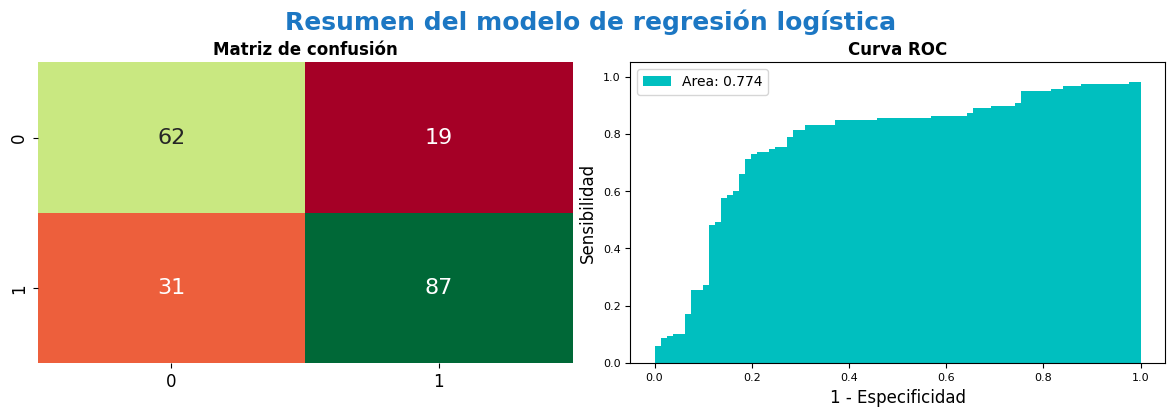

,Value
Precision,0.666667
Sensibilidad,0.765432
Especificidad,0.737288
Accuracy,0.748744
F1_score,0.712644
Area,0.774221
VP,62.000000
VN,87.000000
FP,31.000000
FN,19.000000


In [65]:
dataResult_Haralick_modelLogistic = logistic_model(HARALICK_Train, y_train, HARALICK_Test, y_test, class_weights, 'cyan')
dataResult_Haralick_modelLogistic

#### ***HOG***

c:\Users\matea\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


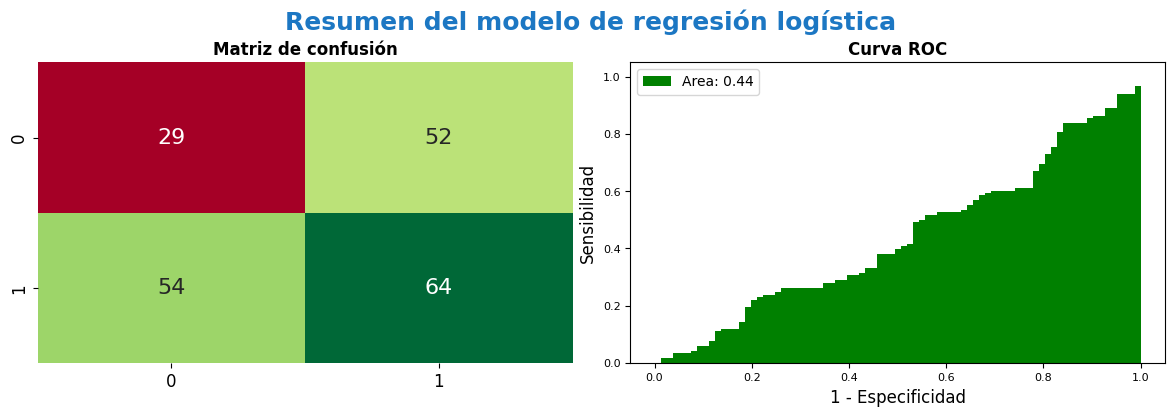

,Value
Precision,0.349398
Sensibilidad,0.358025
Especificidad,0.542373
Accuracy,0.467337
F1_score,0.353659
Area,0.439841
VP,29.000000
VN,64.000000
FP,54.000000
FN,52.000000


In [66]:
dataResult_HOG_modelLogistic = logistic_model(HOG_Train, y_train, HOG_Test, y_test, class_weights, 'green')
dataResult_HOG_modelLogistic

#### ***LBP***

c:\Users\matea\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


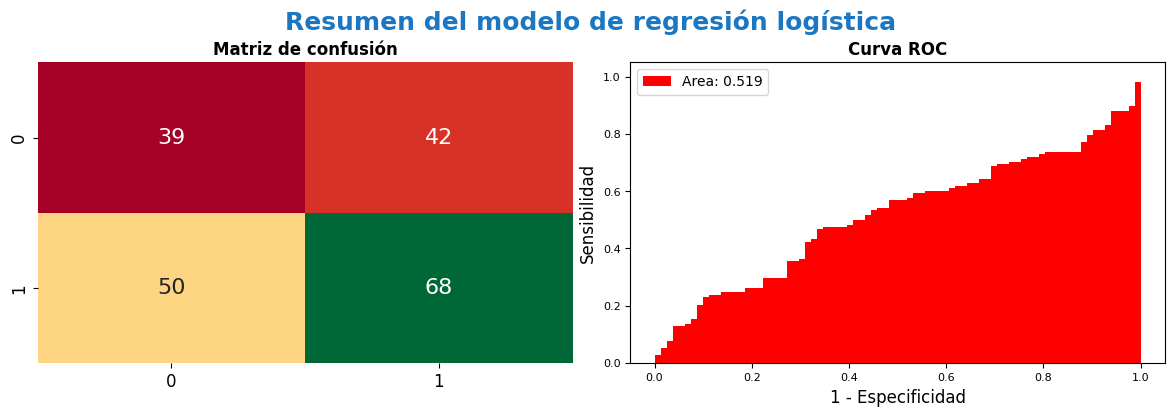

,Value
Precision,0.438202
Sensibilidad,0.481481
Especificidad,0.576271
Accuracy,0.537688
F1_score,0.458824
Area,0.519460
VP,39.000000
VN,68.000000
FP,50.000000
FN,42.000000


In [67]:
dataResult_LBP_modelLogistic = logistic_model(LBP_Train, y_train, LBP_Test, y_test, class_weights, 'red')
dataResult_LBP_modelLogistic

#### ***SIFT***

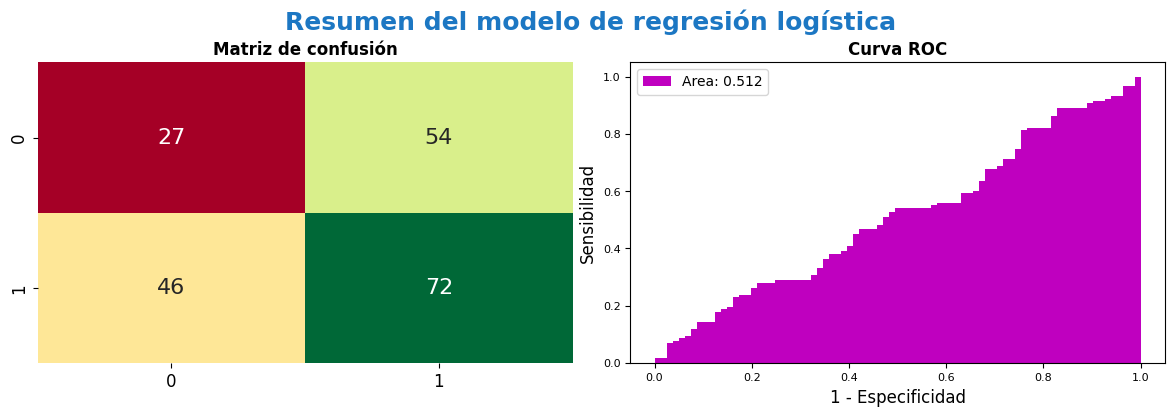

,Value
Precision,0.369863
Sensibilidad,0.333333
Especificidad,0.610169
Accuracy,0.497487
F1_score,0.350649
Area,0.512032
VP,27.000000
VN,72.000000
FP,46.000000
FN,54.000000


In [68]:
dataResult_SIFT_modelLogistic = logistic_model(SIFT_Train, y_train, SIFT_Test, y_test, class_weights, 'm')
dataResult_SIFT_modelLogistic

#### ***WAVELET***

C:\Users\matea\AppData\Local\Temp\ipykernel_12480\1349082371.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = VP/(VP+FP)


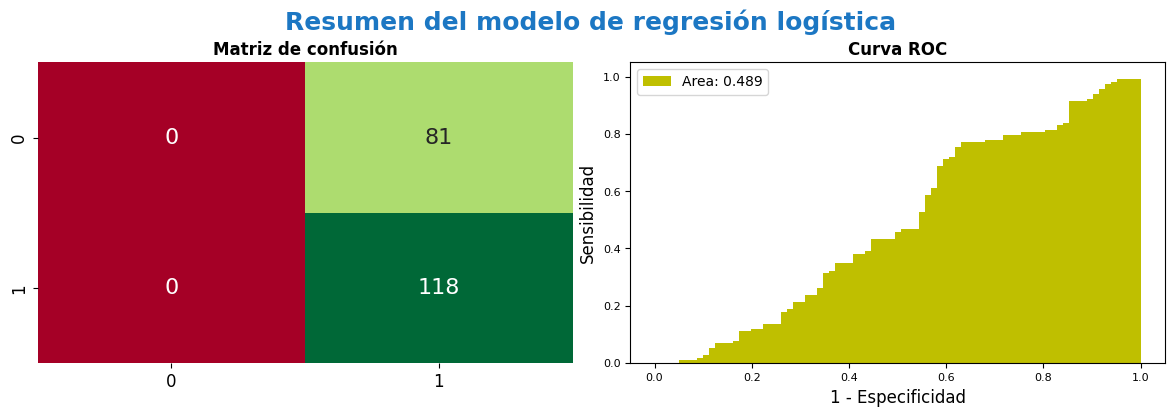

,Value
Precision,NaN
Sensibilidad,0.000000
Especificidad,1.000000
Accuracy,0.592965
F1_score,NaN
Area,0.489119
VP,0.000000
VN,118.000000
FP,0.000000
FN,81.000000


In [69]:
dataResult_WAVELET_modelLogistic = logistic_model(WAVELET_Train, y_train, WAVELET_Test, y_test, class_weights, 'y')
dataResult_WAVELET_modelLogistic

#### ***Exportación de resultados a excel***

In [86]:
writer_Log = pd.ExcelWriter('Resultados Modelo de regresion logistica.xlsx')

dataResult_Haralick_modelLogistic.to_excel(writer_Log, sheet_name="Haralick", index=True)
dataResult_HOG_modelLogistic.to_excel(writer_Log, sheet_name="HOG", index=True)
dataResult_LBP_modelLogistic.to_excel(writer_Log, sheet_name="LBP", index=True)
dataResult_SIFT_modelLogistic.to_excel(writer_Log, sheet_name="SIFT", index=True)
dataResult_WAVELET_modelLogistic.to_excel(writer_Log, sheet_name="WAVELET", index=True)

writer_Log.save()
writer_Log.close()

C:\Users\matea\AppData\Local\Temp\ipykernel_12480\709454511.py:9: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer_Log.save()


#### ***SVM***

In [71]:
def SVM_model(x_train, y_train, x_test, y_test, class_weights, colorGraphic):
    model_SVM = svm.SVC(kernel = 'rbf', class_weight = class_weights, probability=True)  
    model_SVM.fit(x_train, y_train)
    y_pred = model_SVM.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    VP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    VN = cm[1][1]
    precision = VP/(VP+FP)
    sensibilidad = VP/(VP+FN)
    especificidad  = VN/(VN+FP)
    accuracy = (VP+VN)/(VP+VN+FN+FP)
    F1_score = (2*precision*sensibilidad)/(precision+sensibilidad)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, model_SVM.decision_function(x_test))
    
    # AUC
    area = roc_auc_score(y_test, model_SVM.predict_proba(x_test)[:, 1])

    df = pd.DataFrame([precision, sensibilidad, especificidad , accuracy, F1_score, area, VP, VN, FP, FN], columns = ['Value'], 
                      index=['Precision', 'Sensibilidad', 'Especificidad ','Accuracy', 'F1_score', 'Area', 'VP', 'VN', 'FP', 'FN'])

    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    fig.suptitle("Resumen del modelo SVM", fontsize=18, fontweight = 'bold', color='#1C77C3')
    fig.tight_layout()
    sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt=".0f", cbar=False, cmap='RdYlGn', ax=axs[0])
    axs[0].set_title('Matriz de confusión', fontweight = 'bold')    
    axs[0].tick_params(labelsize=12)
    axs[1].stackplot(fpr, tpr, labels = ['Area: '+ str(round(area,3))], colors = colorGraphic)
    axs[1].legend(loc = 'upper left')
    axs[1].set_xlabel('1 - Especificidad', fontsize=12)
    axs[1].set_ylabel('Sensibilidad', fontsize=12)
    axs[1].set_title('Curva ROC', fontweight = 'bold')
    axs[1].tick_params(labelsize=8)
    plt.show()

    return df 
    

#### ***Haralick***

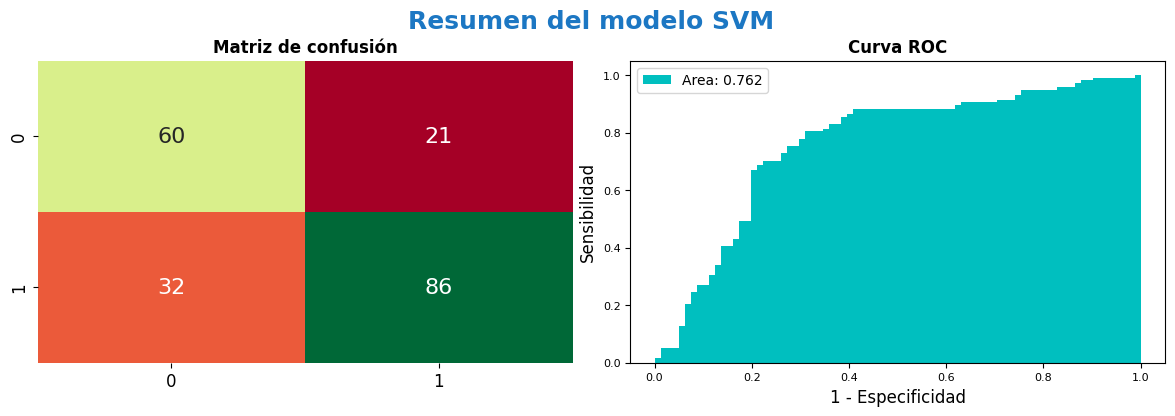

,Value
Precision,0.652174
Sensibilidad,0.740741
Especificidad,0.728814
Accuracy,0.733668
F1_score,0.693642
Area,0.761666
VP,60.000000
VN,86.000000
FP,32.000000
FN,21.000000


In [72]:
dataResult_Haralick_modelSVM = SVM_model(HARALICK_Train, y_train, HARALICK_Test, y_test, class_weights, 'cyan')
dataResult_Haralick_modelSVM

#### ***HOG***

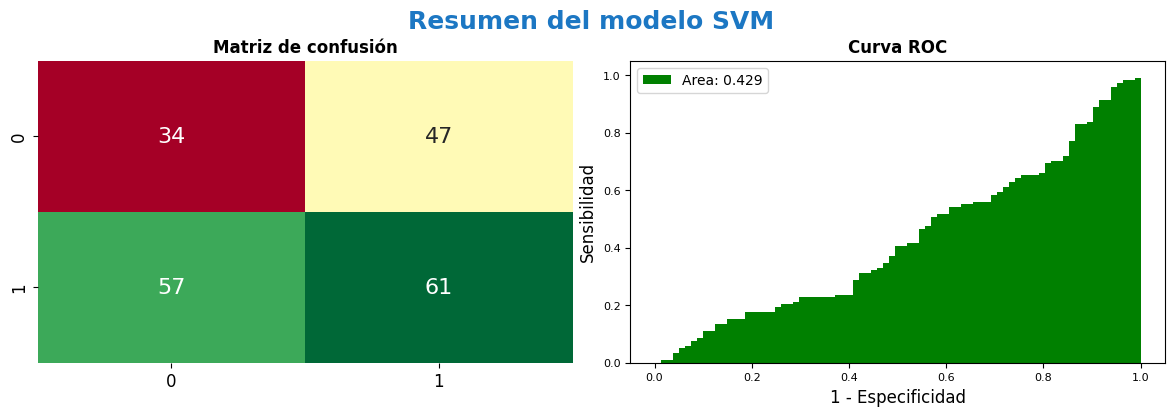

,Value
Precision,0.373626
Sensibilidad,0.419753
Especificidad,0.516949
Accuracy,0.477387
F1_score,0.395349
Area,0.428646
VP,34.000000
VN,61.000000
FP,57.000000
FN,47.000000


In [73]:
dataResult_HOG_modelSVM = SVM_model(HOG_Train, y_train, HOG_Test, y_test, class_weights, 'green')
dataResult_HOG_modelSVM

#### ***LBP***

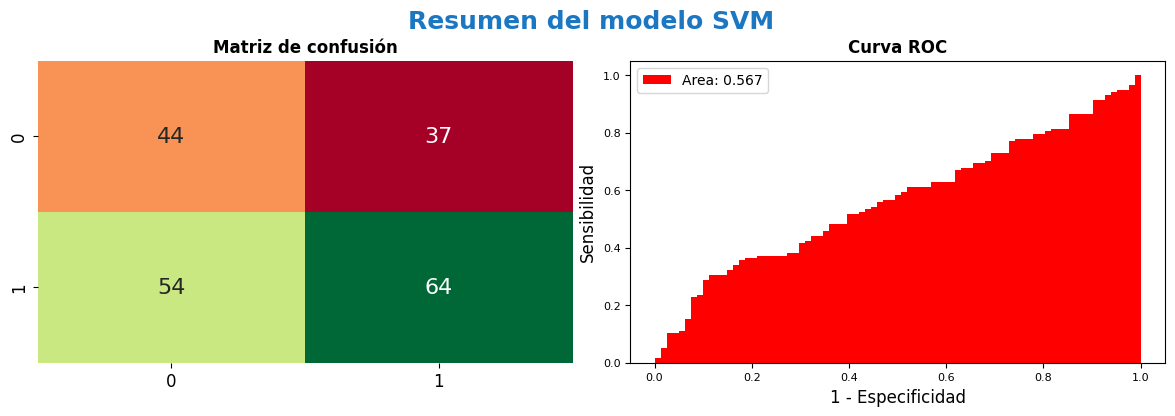

,Value
Precision,0.448980
Sensibilidad,0.543210
Especificidad,0.542373
Accuracy,0.542714
F1_score,0.491620
Area,0.566960
VP,44.000000
VN,64.000000
FP,54.000000
FN,37.000000


In [74]:
dataResult_LBP_modelSVM = SVM_model(LBP_Train, y_train, LBP_Test, y_test, class_weights, 'red')
dataResult_LBP_modelSVM

#### ***SIFT***

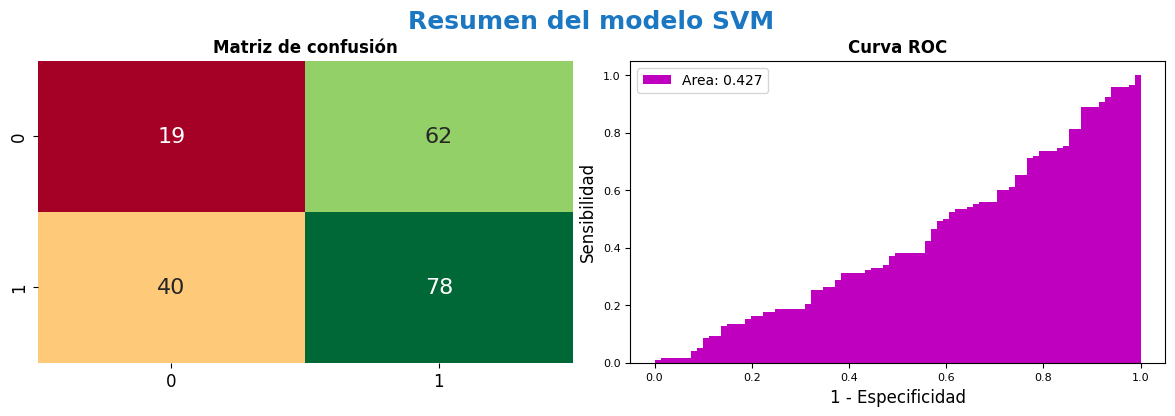

,Value
Precision,0.322034
Sensibilidad,0.234568
Especificidad,0.661017
Accuracy,0.487437
F1_score,0.271429
Area,0.427234
VP,19.000000
VN,78.000000
FP,40.000000
FN,62.000000


In [75]:
dataResult_SIFT_modelSVM = SVM_model(SIFT_Train, y_train, SIFT_Test, y_test, class_weights, 'm')
dataResult_SIFT_modelSVM

#### ***WAVELET***

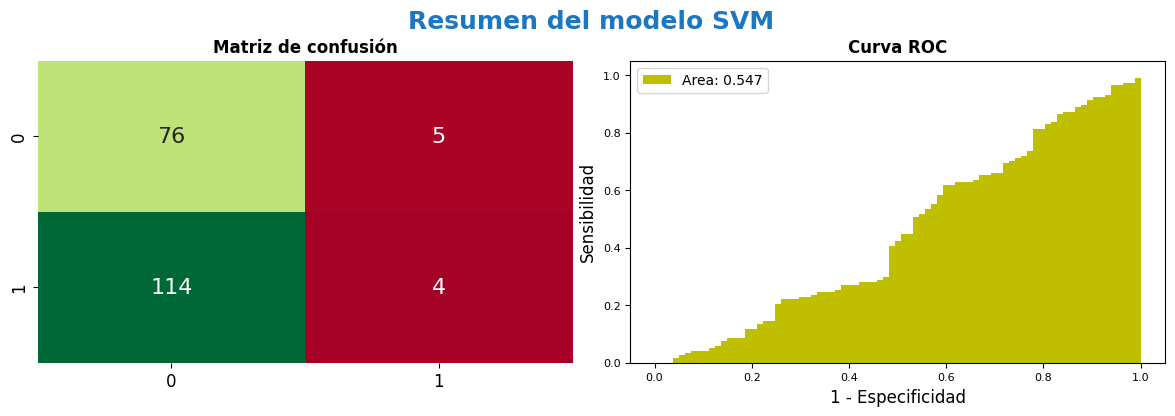

,Value
Precision,0.400000
Sensibilidad,0.938272
Especificidad,0.033898
Accuracy,0.402010
F1_score,0.560886
Area,0.546558
VP,76.000000
VN,4.000000
FP,114.000000
FN,5.000000


In [76]:
dataResult_WAVELET_modelSVM = SVM_model(WAVELET_Train, y_train, WAVELET_Test, y_test, class_weights, 'y')
dataResult_WAVELET_modelSVM

#### ***Exportación de resultados a excel***

In [85]:
writer_SVM = pd.ExcelWriter('Resultados Modelo SVM.xlsx')

dataResult_Haralick_modelSVM.to_excel(writer_SVM, sheet_name="Haralick", index=True)
dataResult_HOG_modelSVM.to_excel(writer_SVM, sheet_name="HOG", index=True)
dataResult_LBP_modelSVM.to_excel(writer_SVM, sheet_name="LBP", index=True)
dataResult_SIFT_modelSVM.to_excel(writer_SVM, sheet_name="SIFT", index=True)
dataResult_WAVELET_modelSVM.to_excel(writer_SVM, sheet_name="WAVELET", index=True)

writer_SVM.save()
writer_SVM.close()

C:\Users\matea\AppData\Local\Temp\ipykernel_12480\1645266397.py:9: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer_SVM.save()


#### ***ANN***

In [48]:
def ANN(x_train, y_train, x_test, y_test, class_weights, colorGraphic):
    np.random.seed(2)
    model_ANN = Sequential()
    model_ANN.add(Dense(x_train.shape[1]+(x_train.shape[1]/4), input_dim=x_train.shape[1], activation='relu'))
    model_ANN.add(Dense(x_train.shape[1], activation='relu'))
    model_ANN.add(Dense(1, activation='sigmoid'))
    model_ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_ANN.fit(x_train, y_train, epochs=100, batch_size=100, class_weight = class_weights)
    y_pred = model_ANN.predict(x_test, use_multiprocessing = True)
    y_pred = [round(x[0]) for x in y_pred]
    
    cm = confusion_matrix(y_test, y_pred)
    VP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    VN = cm[1][1]
    precision = VP/(VP+FP)
    sensibilidad = VP/(VP+FN)
    especificidad  = VN/(VN+FP)
    accuracy = (VP+VN)/(VP+VN+FN+FP)
    F1_score = (2*precision*sensibilidad)/(precision+sensibilidad)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    # AUC   
    area = roc_auc_score(y_test, model_ANN.predict(x_test))

    df = pd.DataFrame([precision, sensibilidad, especificidad , accuracy, F1_score, area, VP, VN, FP, FN], columns = ['Value'], 
                      index=['Precision', 'Sensibilidad', 'Especificidad ','Accuracy', 'F1_score', 'Area', 'VP', 'VN', 'FP', 'FN'])

    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    fig.suptitle("Resumen del modelo de regresión logística", fontsize=18, fontweight = 'bold', color='#1C77C3')
    fig.tight_layout()
    sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt=".0f", cbar=False, cmap='RdYlGn', ax=axs[0])
    axs[0].set_title('Matriz de confusión', fontweight = 'bold')    
    axs[0].tick_params(labelsize=12)
    axs[1].stackplot(fpr, tpr, labels = ['Area: '+ str(round(area,3))], colors = colorGraphic)
    axs[1].legend(loc = 'upper left')
    axs[1].set_xlabel('1 - Especificidad', fontsize=12)
    axs[1].set_ylabel('Sensibilidad', fontsize=12)
    axs[1].set_title('Curva ROC', fontweight = 'bold')
    axs[1].tick_params(labelsize=8)
    plt.show()

    return df 
    

#### ***Haralick***

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 183.4011 - accuracy: 0.3812
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 59.6223 - accuracy: 0.4737
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 33.8246 - accuracy: 0.6925
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 34.9018 - accuracy: 0.7163
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 21.3589 - accuracy: 0.6712
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 21.0222 - accuracy: 0.5775
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 16.9723 - accuracy: 0.6200
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 15.0359 - accuracy: 0.6637
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 12.4497 - accuracy: 0.6137
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 10.9395 - accuracy: 0.6400
Epoch 11/100
8/8 [

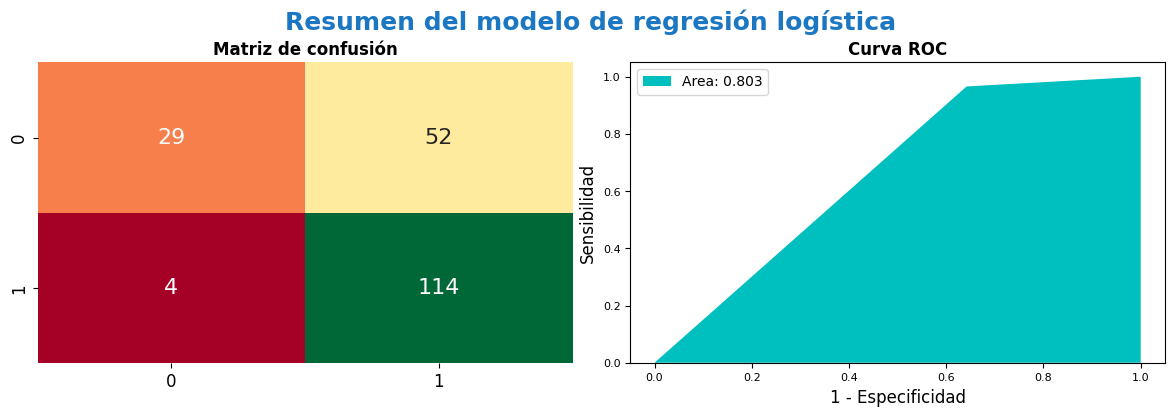

,Value
Precision,0.878788
Sensibilidad,0.358025
Especificidad,0.966102
Accuracy,0.718593
F1_score,0.508772
Area,0.803306
VP,29.000000
VN,114.000000
FP,4.000000
FN,52.000000


In [52]:
dataResult_Haralick_modelANN = ANN(HARALICK_Train, y_train, HARALICK_Test, y_test, class_weights, 'cyan')
dataResult_Haralick_modelANN

#### ***HOG***

Epoch 1/100
8/8 [==============================] - 2s 95ms/step - loss: 1.8577 - accuracy: 0.5163
Epoch 2/100
8/8 [==============================] - 1s 94ms/step - loss: 0.7099 - accuracy: 0.5213
Epoch 3/100
8/8 [==============================] - 1s 103ms/step - loss: 0.6819 - accuracy: 0.5175
Epoch 4/100
8/8 [==============================] - 1s 97ms/step - loss: 0.6636 - accuracy: 0.5625
Epoch 5/100
8/8 [==============================] - 1s 100ms/step - loss: 0.6247 - accuracy: 0.6488
Epoch 6/100
8/8 [==============================] - 1s 95ms/step - loss: 0.6145 - accuracy: 0.6300
Epoch 7/100
8/8 [==============================] - 1s 99ms/step - loss: 0.5755 - accuracy: 0.6800
Epoch 8/100
8/8 [==============================] - 1s 97ms/step - loss: 0.5442 - accuracy: 0.7088
Epoch 9/100
8/8 [==============================] - 1s 96ms/step - loss: 0.4788 - accuracy: 0.7887
Epoch 10/100
8/8 [==============================] - 1s 96ms/step - loss: 0.4725 - accuracy: 0.7738
Epoch 11/100
8/8 

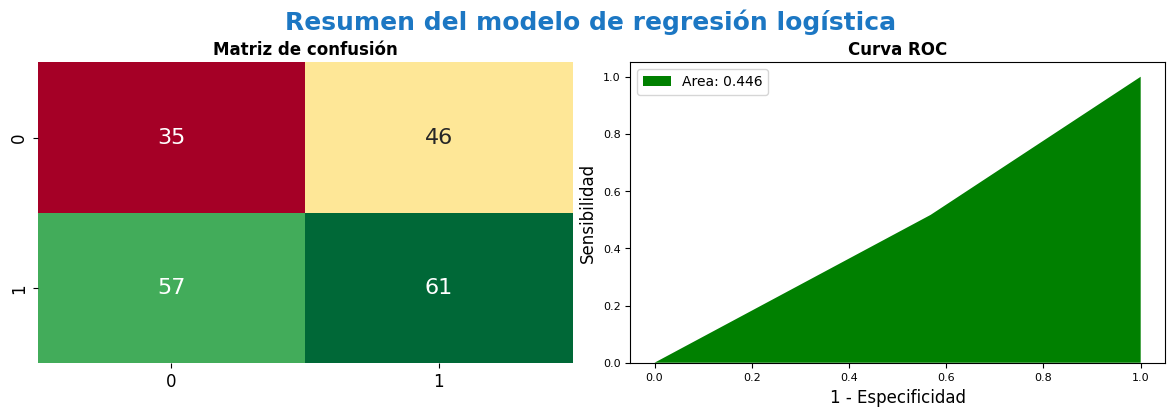

,Value
Precision,0.380435
Sensibilidad,0.432099
Especificidad,0.516949
Accuracy,0.482412
F1_score,0.404624
Area,0.446118
VP,35.000000
VN,61.000000
FP,57.000000
FN,46.000000


In [78]:
dataResult_HOG_modelANN = ANN(HOG_Train, y_train, HOG_Test, y_test, class_weights, 'green')
dataResult_HOG_modelANN

#### ***LBP***

Epoch 1/100
8/8 [==============================] - 3s 10ms/step - loss: 1407.2198 - accuracy: 0.3762
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 592.6043 - accuracy: 0.3750
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 171.7449 - accuracy: 0.6000
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 147.8620 - accuracy: 0.6062
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 85.7777 - accuracy: 0.4112
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 49.7502 - accuracy: 0.5987
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 40.3479 - accuracy: 0.4775
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 33.8788 - accuracy: 0.5663
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 31.2487 - accuracy: 0.5213
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 31.0774 - accuracy: 0.5275
Epoch 11/100


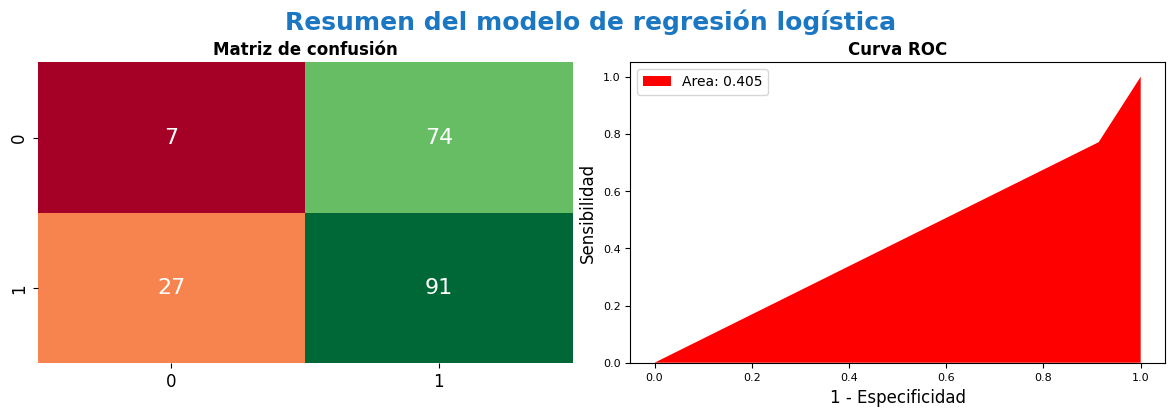

,Value
Precision,0.205882
Sensibilidad,0.086420
Especificidad,0.771186
Accuracy,0.492462
F1_score,0.121739
Area,0.405367
VP,7.000000
VN,91.000000
FP,27.000000
FN,74.000000


In [79]:
dataResult_LBP_modelANN = ANN(LBP_Train, y_train, LBP_Test, y_test, class_weights, 'red')
dataResult_LBP_modelANN

#### ***SIFT***

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 1.2877 - accuracy: 0.6212
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9745 - accuracy: 0.6037
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8016 - accuracy: 0.5725
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7412 - accuracy: 0.5425
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7263 - accuracy: 0.4850
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7151 - accuracy: 0.4863
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7040 - accuracy: 0.5038
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6959 - accuracy: 0.5288
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5550
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5713
Epoch 11/100
8/8 [===========

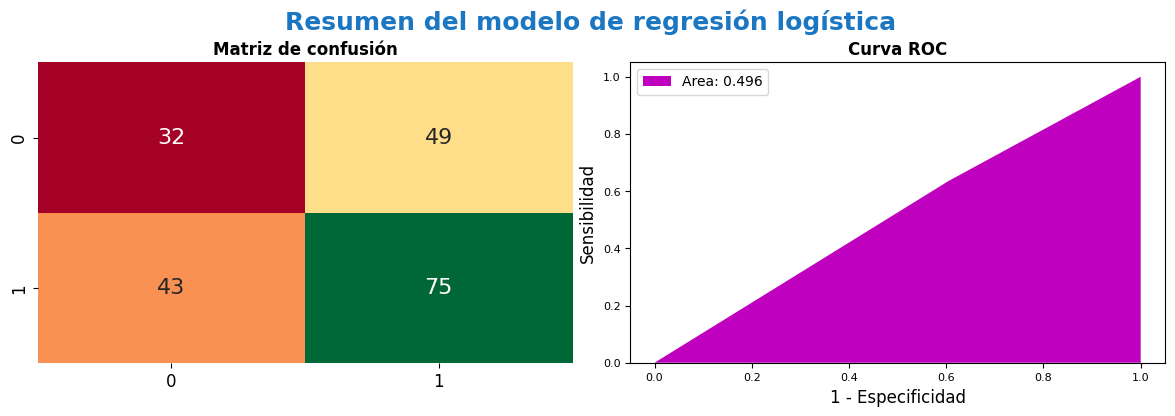

,Value
Precision,0.426667
Sensibilidad,0.395062
Especificidad,0.635593
Accuracy,0.537688
F1_score,0.410256
Area,0.495606
VP,32.000000
VN,75.000000
FP,43.000000
FN,49.000000


In [80]:
dataResult_SIFT_modelANN = ANN(SIFT_Train, y_train, SIFT_Test, y_test, class_weights, 'm')
dataResult_SIFT_modelANN

#### ***WAVELET***

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 6544.8149 - accuracy: 0.4387
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 6627.9224 - accuracy: 0.5412
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 6312.0327 - accuracy: 0.5213
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 4438.3364 - accuracy: 0.5200
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 980.4084 - accuracy: 0.5550
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 839.1739 - accuracy: 0.5075
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 1031.6416 - accuracy: 0.5387
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 3966.8953 - accuracy: 0.5300
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 3337.7668 - accuracy: 0.5537
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 3196.9170 - accuracy: 0.5412
E

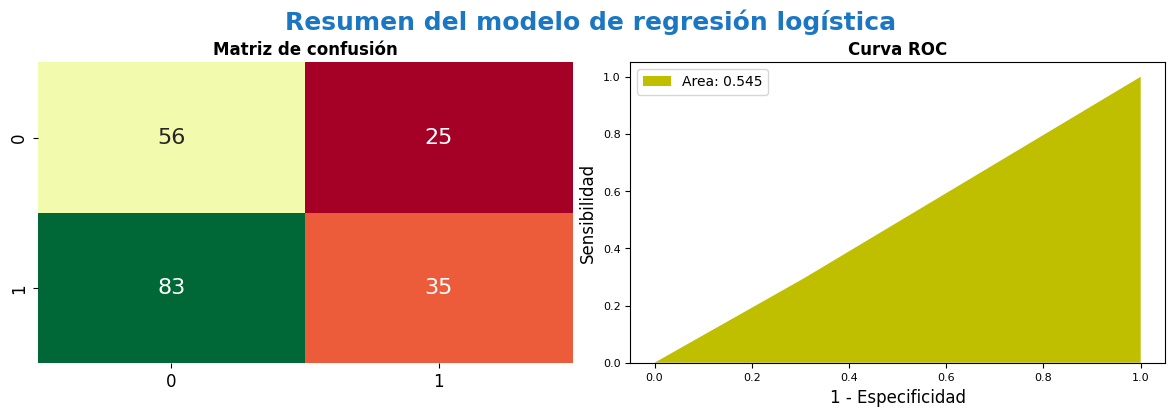

,Value
Precision,0.402878
Sensibilidad,0.691358
Especificidad,0.296610
Accuracy,0.457286
F1_score,0.509091
Area,0.544570
VP,56.000000
VN,35.000000
FP,83.000000
FN,25.000000


In [81]:
dataResult_WAVELET_modelANN = ANN(WAVELET_Train, y_train, WAVELET_Test, y_test, class_weights, 'y')
dataResult_WAVELET_modelANN

#### ***Exportación de resultados a excel***

In [84]:
writer_ANN = pd.ExcelWriter('Resultados Modelo ANN.xlsx')

dataResult_Haralick_modelANN.to_excel(writer_ANN, sheet_name="Haralick", index=True)
dataResult_HOG_modelANN.to_excel(writer_ANN, sheet_name="HOG", index=True)
dataResult_LBP_modelANN.to_excel(writer_ANN, sheet_name="LBP", index=True)
dataResult_SIFT_modelANN.to_excel(writer_ANN, sheet_name="SIFT", index=True)
dataResult_WAVELET_modelANN.to_excel(writer_ANN, sheet_name="WAVELET", index=True)

writer_ANN.save()
writer_ANN.close()

C:\Users\matea\AppData\Local\Temp\ipykernel_12480\1975539322.py:9: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer_ANN.save()
